Feature selected: bmi
Intercept (b): 
 153.73201108209992
Coefficients (w0): 
 [958.76368869]
Mean squared error: 3956.25


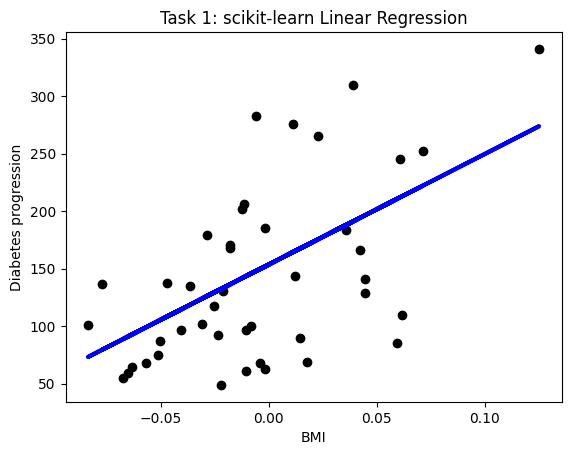

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


diabetes = datasets.load_diabetes()

data_len = len(diabetes.target)
nTestSamples = np.int32(0.1 * data_len)
idx_test = np.arange(1, nTestSamples)
idx_train = np.arange(idx_test[-1] + 1, data_len - idx_test[-1])

print(f"Feature selected: {diabetes.feature_names[2]}")
X_diabetes = diabetes.data[:, np.newaxis, 2]

X_test = X_diabetes[idx_test]
X_train = X_diabetes[idx_train]
y_test = diabetes.target[idx_test]
y_train = diabetes.target[idx_train]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(f"Intercept (b): \n {regr.intercept_}")
print(f"Coefficients (w0): \n {regr.coef_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title("Task 1: scikit-learn Linear Regression")
plt.xlabel("BMI")
plt.ylabel("Diabetes progression")
plt.show()




In [ ]:

print("\n--- Task 2 ---")
X_task2 = np.array([4, 5, 6])
Y_task2 = np.array([4, 5, 6])

def loss_func(W, X, y):
    L = 0
    for x_i, y_i in zip(X, y):
        L += (1 + (W * x_i * y_i))**2
    return L / len(X)

loss_hist = []
print("  W Value |     Loss")
print("-----------------------")
for feed_W in np.linspace(-3, 5, num=15):
    curr_loss = loss_func(feed_W, X_task2, Y_task2)
    loss_hist.append(curr_loss)
    print(f" {feed_W:6.3f} | {curr_loss:10.5f}")


--- Task 2 ---
  W Value |     Loss
-----------------------
 -3.000 | 6378.00000
 -2.429 | 4156.28571
 -1.857 | 2408.47619
 -1.286 | 1134.57143
 -0.714 |  334.57143
 -0.143 |    8.47619
  0.429 |  156.28571
  1.000 |  778.00000
  1.571 | 1873.61905
  2.143 | 3443.14286
  2.714 | 5486.57143
  3.286 | 8003.90476
  3.857 | 10995.14286
  4.429 | 14460.28571
  5.000 | 18399.33333


Starting Gradient Descent with lr=0.1, epochs=2000
Epoch 0: Loss = 29619.1155, w = 0.0000, b = 0.0000
Epoch 200: Loss = 5676.5864, w = 81.2823, b = 153.6678
Epoch 400: Loss = 5399.6928, w = 155.6831, b = 153.6732
Epoch 600: Loss = 5167.7637, w = 223.7755, b = 153.6782
Epoch 800: Loss = 4973.4972, w = 286.0945, b = 153.6828
Epoch 1000: Loss = 4810.7775, w = 343.1294, b = 153.6869
Epoch 1200: Loss = 4674.4817, w = 395.3285, b = 153.6908
Epoch 1400: Loss = 4560.3188, w = 443.1016, b = 153.6943
Epoch 1600: Loss = 4464.6946, w = 486.8241, b = 153.6975
Epoch 1800: Loss = 4384.5988, w = 526.8394, b = 153.7004

Gradient Descent Finished.
Final Intercept (b): 153.7031
Final Coefficient (w): 563.4618
Final Loss: 4317.8164

Comparison with Task 1 (scikit-learn):
scikit-learn Intercept (b): 153.7320
scikit-learn Coefficient (w): 958.7637


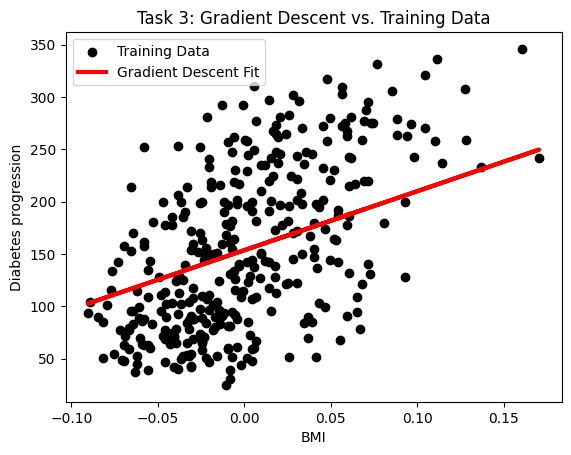

In [3]:


X_train_gd = X_train.squeeze()
y_train_gd = y_train
N = float(len(X_train_gd))

w = 0.0
b = 0.0
learning_rate = 0.1
epochs = 2000
min_loss_delta = 1e-6
previous_loss = float('inf')

print(f"Starting Gradient Descent with lr={learning_rate}, epochs={epochs}")

for i in range(epochs):
    y_pred_gd = (w * X_train_gd) + b

    loss = np.mean((y_train_gd - y_pred_gd)**2)

    if i % 200 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

    if abs(previous_loss - loss) < min_loss_delta:
        print(f"Stopping early on epoch {i} due to minimal change in loss.")
        break
    
    previous_loss = loss

    d_w = (-2 / N) * np.sum(X_train_gd * (y_train_gd - y_pred_gd))
    d_b = (-2 / N) * np.sum(y_train_gd - y_pred_gd)

    w = w - (learning_rate * d_w)
    b = b - (learning_rate * d_b)

print("\nGradient Descent Finished.")
print(f"Final Intercept (b): {b:.4f}")
print(f"Final Coefficient (w): {w:.4f}")
print(f"Final Loss: {previous_loss:.4f}")

print("\nComparison with Task 1 (scikit-learn):")
print(f"scikit-learn Intercept (b): {regr.intercept_:.4f}")
print(f"scikit-learn Coefficient (w): {regr.coef_[0]:.4f}")

y_pred_final_gd = (w * X_train_gd) + b
plt.scatter(X_train_gd, y_train_gd, color='black', label='Training Data')
plt.plot(X_train_gd, y_pred_final_gd, color='red', linewidth=3, label='Gradient Descent Fit')
plt.title("Task 3: Gradient Descent vs. Training Data")
plt.xlabel("BMI")
plt.ylabel("Diabetes progression")
plt.legend()
plt.show()
